<a href="https://colab.research.google.com/github/ayanoglu/REDGPA/blob/DNN/REDGPAmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import io

uploaded = files.upload()

Saving Psychology Subject Pool Spring 2021.csv to Psychology Subject Pool Spring 2021.csv


In [82]:
DF = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool Spring 2021.csv']), header=None, skip_blank_lines=True)

In [83]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID5_7,Q50_1,Q50_2,Q50_3,Q50_4,Q50_5,Q50_6,Q50_7,Q50_8,Q50_9,Q50_10,Q50_11,Q50_12,Q50_13,Q50_14,Q50_15,...,Q3,Q4,Q25,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,q16,Q17,Q18,Q19,Q20,q21,q22,Q23,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,QID9,Q47,Q44,Q45,Q46,Q46_2_TEXT,QID13,QID14,QID15,id
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Information to Consider Before Taking Part in ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,...,Each of the following questions has two option...,I had just bought a new piece of equipment (fo...,I have to talk to someone about something impo...,When I am told that my work has been completel...,If I'm stuck in traffic and miss an important ...,When something really gets me down.,When several things go wrong on the same day,When I have to put all my effort into doing a ...,When I know I must finish something soon.,When I don't have anything in particular to do...,When I am getting ready to tackle a difficult ...,When I have to solve a difficult problem.,When I have a lot of important things to do an...,When I have to take care of something importan...,When I am facing a big project that has to be ...,When I have an obligation to do something that...,When I have learned a new and interesting game.,When one of my friends brings up an interestin...,When I am busy working on an interesting project.,When I read something I find interesting.,When I am trying to learn something new that I...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,Please indicate the overall satisfaction level...,How many hours a week do you work (paid employ...,What is your cumulative USF GPA?,What year are you?,What is your major? - Selected Choice,"What is your major? - Other, please specify - ...",What is your gender?,What is your age?,What is your ethnicity?,id
2,"{""

In [ ]:
DF.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.048128,6.272727,5.882353,5.855615,6.203209,5.326203,6.171123,5.732620,3.684492,4.743316,4.352941,3.850267,4.267380,4.240642,6.112299,6.058824,5.721925,3.743316,4.545455,6.213904,4.871658,4.048128,4.700535,4.508021,4.326203,5.342246,5.149733,3.518717,3.737968,3.898396,4.085561,3.165775,4.545455,1.625668,1.716578,1.978610,2.219251,2.336898,3.572193,2.331551,4.288770,3.326203,3.320214
std,0.990728,0.870950,1.134531,1.157262,0.892857,1.689788,1.160562,1.197289,1.805584,1.582293,1.698681,1.753349,1.873171,1.799300,1.206260,1.150860,1.185803,1.891803,1.808528,1.081228,1.676722,1.757575,1.821659,1.841484,1.711915,1.672189,1.498758,1.861732,2.061110,1.879530,1.878902,2.288190,1.766419,1.130698,1.116780,1.213531,1.112033,1.327491,0.949746,1.465451,0.606446,1.588097,0.426340
min,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.760000
25%,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,6.000000,6.000000,5.000000,2.000000,3.000000,6.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000,3.005000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.320000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,7.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,5.000000,3.635000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.690000


In [ ]:
DF = DF.dropna(axis=1)
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,6,6,6,6,6,6,7,5,3,3,5,5,6,4,4,6,5,7,6,6,6,3,5,5,4,5,5,5,6,5,5,1,1,1,1,1,3,3,4,1,5,5
1,7,7,6,6,6,7,7,7,5,6,6,2,2,4,7,6,7,7,4,6,5,6,2,2,6,6,6,2,6,4,4,4,7,3,1,4,1,1,4,4,5,2
2,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,6,6,6,1,4,3,5,5,1,1,1,1,4,4,4,2
3,6,6,6,5,6,6,5,7,3,7,4,4,4,3,3,3,7,5,5,5,4,5,4,5,5,5,5,4,4,1,1,1,7,1,1,2,2,2,2,1,4,5
4,6,7,6,6,6,6,7,5,4,3,5,1,1,5,7,7,6,2,2,7,5,4,1,1,6,7,4,5,1,4,4,4,7,1,1,1,1,1,5,4,4,2


In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.048128,6.272727,5.882353,5.855615,6.203209,5.326203,6.171123,5.732620,3.684492,4.743316,4.352941,3.850267,4.267380,4.240642,6.112299,6.058824,5.721925,3.743316,4.545455,6.213904,4.871658,4.048128,4.700535,4.508021,4.326203,5.342246,5.149733,3.518717,3.737968,3.898396,4.085561,3.165775,4.545455,1.625668,1.716578,1.978610,2.219251,2.336898,3.572193,2.331551,4.288770,3.326203
std,0.990728,0.870950,1.134531,1.157262,0.892857,1.689788,1.160562,1.197289,1.805584,1.582293,1.698681,1.753349,1.873171,1.799300,1.206260,1.150860,1.185803,1.891803,1.808528,1.081228,1.676722,1.757575,1.821659,1.841484,1.711915,1.672189,1.498758,1.861732,2.061110,1.879530,1.878902,2.288190,1.766419,1.130698,1.116780,1.213531,1.112033,1.327491,0.949746,1.465451,0.606446,1.588097
min,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,6.000000,6.000000,5.000000,2.000000,3.000000,6.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,7.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


I am not sure if we should normalize at this point. Doesnt seem necessary.

In [ ]:
y.head()

0    3.30
1    3.21
2    2.70
3    3.30
4    3.30
Name: 43, dtype: float64

TRY DNN MODEL

In [ ]:
# Model configuration
batch_size = 10
no_epochs = 50
verbosity = 0
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(X):

  # Define the model architecture
  model1 = Sequential()
  model1.add(Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
  model1.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model1.compile(loss='mean_squared_error', optimizer='adam')

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model1.fit(X.iloc[train_index], y.iloc[train_index],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model1.evaluate(X.iloc[test_index], y.iloc[test_index], verbose=0)
  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  
  print(f'Score for fold {fold_no}: {model1.metrics_names[0]} is {scores}')

  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss is 0.3206396698951721
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss is 0.21313920617103577
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss is 0.2547804117202759
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss is 0.1300947517156601
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss is 0.1825939267873764
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss is 0.2940904200077057
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss is 0.21789109706878662
----

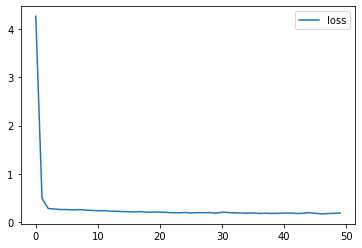

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
model1.evaluate(X.iloc[test_index], y.iloc[test_index], batch_size=10)

2/2 [==============================] - 0s 4ms/step - loss: 0.2314


0.23135071992874146

In [ ]:
y_predict_dnn = model1.predict(X.iloc[test_index])
y_test = y.iloc[test_index]

In [ ]:
mean_squared_error(y_test, y_predict_dnn)

0.23135067887312896

In [ ]:
idx   = np.argsort(y_test)
y_predict_dnn = y_predict_dnn.reshape(y_predict_dnn.shape[0],)
list1 = np.array(y_test)[idx]
list2 = np.array(y_predict_dnn)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_predict_dnn", line_shape='linear'))
fig.update_layout(title_text='DNN MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
# #train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])
# DF2shuffled = shuffle(DF2)
# train_Input, test_input = np.split(DF2shuffled, [int(.8 * len(DF2))])

# X_train = train_Input.iloc[:,:-1]
# y_train = train_Input.iloc[:,-1]
# # X_val_Input = val_Input.iloc[:,:-1]
# # y_val= val_Input.iloc[:,-1]
# X_test = test_input.iloc[:,:-1]
# y_test = test_input.iloc[:,-1]